# Analyze HN using NLP!

### Import and set up some stuff

In [1]:
%cd ..

/home/jayant/Projects/recurse/hn_analyze


In [2]:
import os
import pickle
import logging

import numpy as np

In [3]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12, 8]

In [6]:
DATA_DIR = 'data/'
RAW_ARTICLES_DIR = os.path.join(DATA_DIR, 'articles', 'raw')
PARSED_ARTICLES_DIR = os.path.join(DATA_DIR, 'articles', 'parsed')
CORPUS_DIR = os.path.join(DATA_DIR, 'corpora')
TEST_ARTICLES_DIR = os.path.join(DATA_DIR, 'articles', 'test')
MALLET_PATH = '/home/jayant/Projects/recurse/mallet-2.0.8/bin/mallet'

## Load trained model

In [7]:
model = pickle.load(open('data/articles/models/hn_ldam_mallet_100t_5a', 'rb'))

## Print all topics, ordered by "importance" scores

In [11]:
model.print_topics_table()

   Topic #99      Topic #29      Topic #38      Topic #43      Topic #56      Topic #70   
  ----------     ----------     ----------     ----------     ----------     ----------   
    network         earth        container       quantum        bitcoin          car      
     model          space         docker         theory       transaction      vehicle    
   learning         star            run          physics      blockchain        drive     
    neural         planet         service       particle        network         tesla     
     learn          orbit          image        universe        wright          road      
    machine         moon        application     physicist        block          bike      
     deep           year          deploy          wave         ethereum        driver     
   training         mars          cluster         field          trust          model     
     layer         galaxy         machine         hole         currency       electric    

A topic is NOT exactly a "category", it is a list of "related words". It is intended to represent a broad theme of interest.

## Show all articles for a specific topic

In [96]:
model.show_topic_articles(99, top_n=5)

   Topic #99   
  ----------   
    network    
     model     
   learning    
    neural     
     learn     
    machine    
     deep      
   training    
     layer     
     image     


---------------------------------------------------------------------
Article #11052034 - http://www.wildml.com/deep-learning-glossary/
Deep Learning Glossary
Topic score: 0.83

This glossary is work in progress and I am planning to continuously update it. If you find a mistake or think an important term is missing, please let me know in the comments or via email.

Deep Learning terminology can be quite overwhelming to newcomers. This glossary tries to define commonly used terms and link to original references and additional resources to help readers dive deeper into a specific topic.

The boundary between what is Deep Learning vs. “general” Machine Learning termino


---------------------------------------------------------------------
Article #10384279 - http://blog.christianperone.com/2015/08

In [97]:
model.show_topic_articles(44, top_n=5)

   Topic #44   
  ----------   
  government   
    agency     
   security    
      nsa      
 surveillance  
      fbi      
    snowden    
 intelligence  
   document    
  information  


---------------------------------------------------------------------
Article #10304864 - https://edwardsnowden.com/
Edwardsnowden.com
Topic score: 0.78

Who Is Edward Snowden?

Edward Snowden is a 31 year old US citizen, former Intelligence Community officer and whistleblower. The documents he revealed provided a vital public window into the NSA and its international intelligence partners’ secret mass surveillance programs and capabilities. These revelations generated unprecedented attention around the world on privacy intrusions and digital security, leading to a global debate on the issue.

Snowden worked in various roles within the US Intel


---------------------------------------------------------------------
Article #11748746 - http://www.theguardian.com/us-news/2016/may/22/snowden-whistl

## Show topics for a given article

### Article from the corpus

In [10]:
model.show_article_topics(10577102)

---------------------------------------------------------------------
Article #10577102 - http://www.nytimes.com/2015/11/17/us/after-paris-attacks-cia-director-rekindles-debate-over-surveillance.html
After Paris Attacks, C.I.A. Director Rekindles Debate Over Surveillance
“As far as I know, there’s no evidence the French lacked some kind of surveillance authority that would have made a difference,” said Jameel Jaffer, deputy legal director of the American Civil Liberties Union. “When we’ve invested new powers in the government in response to events like the Paris attacks, they have often been abused.”

The debate over the proper limits on government dates to the origins of the United States, with periodic overreaching in the name of security being cur


   Topic #44      Topic #67      Topic #69   
 Score (0.32)   Score (0.19)   Score (0.15)  
  ----------     ----------     ----------   
  government         al            story     
    agency          state        continue    
   secu

Last topic is artifact of NYTimes articles - advertisements and the signup box containing an option to subscribe to the newsletter buttons get scraped too.

### Random unseen article from HN

In [12]:
# Download and parse article text
url = "https://www.ligo.caltech.edu/news/ligo20170927"

In [13]:
model.show_article_topics_from_url(url)

Article: https://www.ligo.caltech.edu/news/ligo20170927
Article text:
 News Release • September 27, 2017

The LIGO Scientific Collaboration and the Virgo collaboration report the first joint detection of gravitational waves with both the LIGO and Virgo detectors. This is the fourth announced detection of a binary black hole system and the first significant gravitational-wave signal recorded by the Virgo detector, and highlights the scientific potential of a three-detector network of gravitational-wave detectors.

The three-detector observation was made on August 14 (...)(trimmed)

Most relevant topics:

   Topic #29      Topic #10      Topic #89   
 Score (0.31)   Score (0.15)   Score (0.13)  
  ----------     ----------     ----------   
     earth          light       university   
     space          laser        research    
     star         electron        science    
    planet          field          paper     
     orbit         energy       researcher   
     moon           h

# Topic trends

Some cherrypicking for interesting results

In [11]:
iplot(model.topic_trend_plot(11))

Topic #11: 0.022*"flight" + 0.018*"fly" + 0.016*"air" + 0.015*"space" + 0.015*"aircraft" + 0.014*"launch" + 0.014*"plane" + 0.014*"drone" + 0.012*"pilot" + 0.012*"rocket"



In [12]:
iplot(model.topic_trend_plot(35))

Topic #35: 0.030*"image" + 0.022*"uk" + 0.018*"london" + 0.015*"caption" + 0.013*"mr" + 0.013*"copyright" + 0.012*"british" + 0.011*"japan" + 0.010*"year" + 0.010*"people"



In [13]:
iplot(model.topic_trend_plot(44))

Topic #44: 0.026*"government" + 0.017*"agency" + 0.013*"security" + 0.012*"nsa" + 0.012*"surveillance" + 0.011*"fbi" + 0.011*"snowden" + 0.010*"intelligence" + 0.010*"document" + 0.010*"information"



# Topic Intersection

In [26]:
model.show_topic_articles([65, 66], top_n=5)

   Topic #65      Topic #66   
  ----------     ----------   
     game          google     
    player        computer    
     play        technology   
     move          machine    
      win           human     
     world         system     
     chess          world     
   computer          ai       
     level          year      
     sport          robot     


---------------------------------------------------------------------
Article #11250871 - http://googleasiapacific.blogspot.com/2016/03/alphagos-ultimate-challenge.html
AlphaGos ultimate challenge: a five-game match against Lee Sedol
Topic score: 0.35

Game 3 - March 12, 2016

“It’s arguable that in the first two games Lee Sedol was playing differently than his true style, trying to find a weakness in the computer. Today Lee was definitely playing his own game, from his strong opening to the complicated moves in the final kō. AlphaGo was ready for everything, including the kō fights, and was able to take the win. I’d l

## Similar topics

In [27]:
model.show_similar_topics(44, top_n=5)

   Topic #44   
  ----------   
  government   
    agency     
   security    
      nsa      
 surveillance  
      fbi      
    snowden    
 intelligence  
   document    
  information  


Topics similar to topic #44
---------------------------

   Topic #73      Topic #3       Topic #98      Topic #50      Topic #67   
 Score (0.23)   Score (0.18)   Score (0.17)   Score (0.16)   Score (0.15)  
  ----------     ----------     ----------     ----------     ----------   
      law           group          datum        security          al       
     court         public          user          attack          state     
     case         political     information   vulnerability     attack     
     legal          state          data          exploit         group     
     rule          member         privacy        hacker       government   
     state         policy         access        password        country    
    lawyer        campaign        service       attacker        i

## Topic Importance

In [70]:
# Get topic article scores
def get_topic_article_scores(m, topic_id, min_threshold=0.05):
    topic_vector = m.article_topic_matrix[:, topic_id]
    topic_vector = topic_vector[np.where(topic_vector > min_threshold)]
    return topic_vector

In [71]:
def plot_topic_article_distribution(model, topic_ids):
    if not isinstance(topic_ids, (list, tuple)):
        topic_ids = [topic_ids]
    title = "Topics %s" % ", ".join(["#%d" % topic_id for topic_id in topic_ids])
    layout = go.Layout(
        title=title,
        barmode='overlay',
        xaxis=dict(
            title='Topic Score'
        ),
        yaxis=dict(
            title='Number of Articles'
        ),
    )
    xbins = {
        'start':0,
        'end':1,
        'size':0.1
    }
    data = [
        go.Histogram(
            x=get_topic_article_scores(model, topic_id),
            opacity=0.4,
            name='Topic #%d' % topic_id,
            xbins=xbins,
        )
        for topic_id in topic_ids
    ]
    figure = go.Figure(data=data, layout=layout)
    return iplot(figure)

In [72]:
topics_of_interest = [43, 95]

In [73]:
model.print_topics_table(topics_of_interest)

   Topic #43      Topic #95   
  ----------     ----------   
    quantum         test      
    theory          code      
    physics         error     
   particle          bug      
   universe        problem    
   physicist         fix      
     wave           check     
     field          fail      
     hole           issue     
     state           run      




In [74]:
plot_topic_article_distribution(model, topics_of_interest)

In [75]:
model.print_topics_table()

   Topic #99      Topic #29      Topic #38      Topic #43      Topic #56      Topic #70   
  ----------     ----------     ----------     ----------     ----------     ----------   
    network         earth        container       quantum        bitcoin          car      
     model          space         docker         theory       transaction      vehicle    
   learning         star            run          physics      blockchain        drive     
    neural         planet         service       particle        network         tesla     
     learn          orbit          image        universe        wright          road      
    machine         moon        application     physicist        block          bike      
     deep           year          deploy          wave         ethereum        driver     
   training         mars          cluster         field          trust          model     
     layer         galaxy         machine         hole         currency       electric    

## Topic Clusters

In [18]:
model.print_topics_table(model.get_common_topics(metric='word_doc_sim'))

   Topic #59      Topic #72      Topic #4       Topic #18      Topic #37      Topic #46   
  ----------     ----------     ----------     ----------     ----------     ----------   
    system          thing         people          thing          life          percent    
    problem         find           thing         people         family          year      
    change          post           feel            lot           year            job      
    require         give           fact           start         friend         worker     
    design          write          human          year            day           rate      
   approach         start          point           big          people         income     
     large          read           world         problem         live           high      
     level          point        question         back           home            low      
    process        article        person         happen           man         increase    

In [17]:
def print_clusters_and_matrices(model, metric):
    cluster_labels, cluster_scores = model.cluster_topics(metric=metric, exclude_common=True, exclude_standalone=True, threshold_percentile=85)
    model.print_topic_clusters(cluster_labels)
    model.plot_topic_similarities(metric=metric, threshold_percentile=85)
    model.plot_clustered_topic_similarities(cluster_labels, metric=metric, threshold_percentile=85)
    return cluster_scores

In [18]:
cluster_labels, cluster_scores = model.cluster_topics(metric='word_doc_sim', exclude_common=True, exclude_standalone=True, threshold_percentile=85)

In [19]:
model.print_topic_clusters(cluster_labels)

Cluster 0----------------------------------
Topic #13: 0.030*"stack" + 0.028*"instruction" + 0.022*"register" + 0.021*"address" + 0.021*"code" + 0.017*"call" + 0.015*"memory" + 0.010*"byte" + 0.010*"program" + 0.010*"function"
Topic #52: 0.017*"pi" + 0.017*"board" + 0.014*"usb" + 0.014*"chip" + 0.012*"power" + 0.012*"hardware" + 0.011*"card" + 0.011*"km" + 0.010*"device" + 0.010*"controller"
Topic #77: 0.028*"memory" + 0.025*"cpu" + 0.024*"core" + 0.023*"intel" + 0.022*"performance" + 0.020*"cache" + 0.019*"processor" + 0.018*"chip" + 0.015*"op" + 0.014*"gpu"
Topic #84: 0.047*"device" + 0.019*"phone" + 0.015*"camera" + 0.011*"battery" + 0.011*"laptop" + 0.010*"vr" + 0.010*"screen" + 0.009*"smartphone" + 0.008*"home" + 0.008*"hardware"
Topic #97: 0.031*"phone" + 0.030*"network" + 0.024*"internet" + 0.021*"radio" + 0.019*"signal" + 0.016*"mobile" + 0.016*"device" + 0.013*"channel" + 0.012*"service" + 0.012*"fi"


Cluster 1----------------------------------
Topic #20: 0.050*"int" + 0.049*

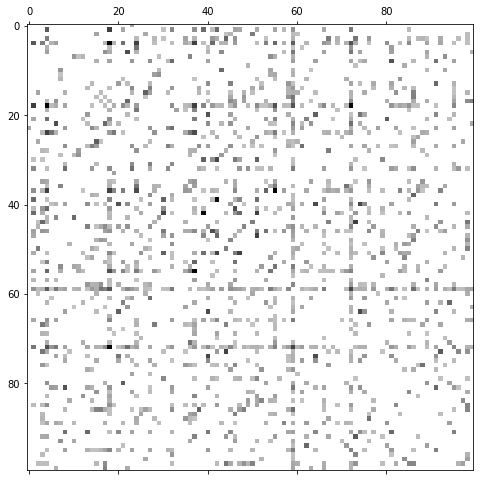

In [20]:
model.plot_topic_similarities(metric='word_doc_sim', threshold_percentile=85)

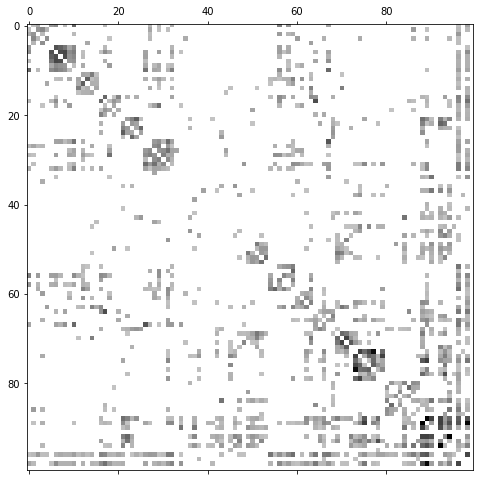

In [21]:
model.plot_clustered_topic_similarities(cluster_labels, metric='word_doc_sim', threshold_percentile=85)